In [27]:
import os
import cv2
import glob
import random
import warnings
import numpy as np
from PIL import Image
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
from numpy.linalg import matrix_power
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [28]:
n_images = 250
images = []

while len(images) != n_images:
    idx = random.randint(14, 25000)
    image_name = f'im{idx}.jpg'
    image = cv2.imread(glob.glob(f'./images/mirflickr/{image_name}')[0])[:, :, 1]
    images.append(image)
    
images = np.asarray(images)
assert len(images) == n_images

# Провести декомпозицію каналу зеленого кольору тестових зображень з використанням методу головних компонент (PCA):

In [29]:
def pca_compres(image, components = None, inverse = True):
    pca = PCA(n_components=components, svd_solver='full')
    res = pca.fit_transform(image)
    if inverse:
        return pca.inverse_transform(res)
    return pca, res

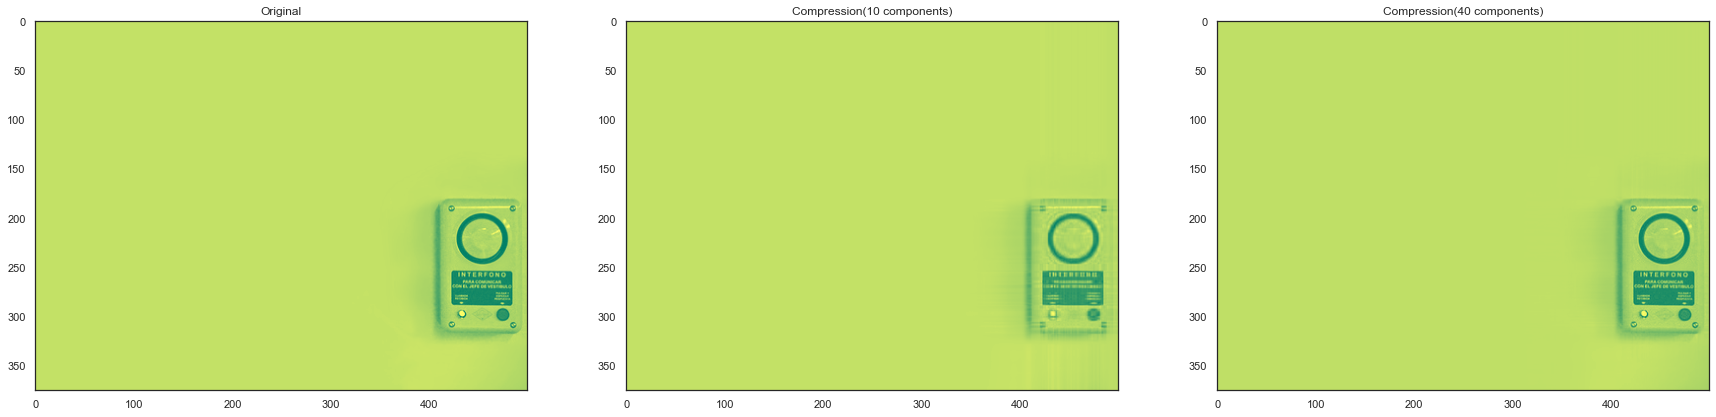

In [67]:
plt.figure(figsize=(30,30))
plt.subplot(131)
plt.title('Original')
plt.imshow(images[0], cmap='summer')

plt.subplot(132)
plt.title('Compression(10 components)')
plt.imshow(pca_compres(images[0], components=10), cmap='summer');

plt.subplot(133)
plt.title('Compression(40 components)')
plt.imshow(pca_compres(images[0], components=40), cmap='summer');

# Для каналу зеленого кольору тестових зображень обчислити наступні характеристики розподілу значень яскравості пікселів:

In [47]:
# Впорядкувати отримані компоненти вихідного зображення в порядку зменшення значень сингулярних чисел
pca, compressed = pca_compres(images[0], inverse = False)
pca.singular_values_

array([7382.47647801, 2906.83783541, 1985.69278864, 1689.29679855,
       1486.47351195, 1277.45525374, 1186.71237353,  861.8368104 ,
        782.91647622,  678.9771406 ,  569.72113213,  555.89174323,
        516.74727083,  495.99025968,  458.45690642,  441.48723617,
        404.49311209,  386.38144304,  354.36001137,  329.5736838 ,
        317.75079891,  304.28031401,  285.17601109,  278.90350441,
        273.80631306,  263.43158962,  252.08913432,  236.89573844,
        220.77714738,  212.40854931,  205.70926821,  193.42452409,
        192.19642837,  182.35555505,  171.13150045,  168.87506658,
        162.23236897,  155.18461936,  152.53141077,  141.60655684,
        137.90994176,  133.90122718,  132.50786979,  129.8512797 ,
        120.05880327,  108.7319708 ,  106.82122492,  103.56881295,
         96.53708172,   95.67240233,   92.76552238,   89.35377605,
         85.20163301,   84.23744123,   80.66055797,   76.96077673,
         72.7600043 ,   72.24623839,   67.15845916,   64.51442

image shape:  (375, 500)
MSE 10% components 37:  1.6938772811114584
MSE 20% components 75:  0.07281129501166399
MSE 30% components 112:  0.0027286510344097644
MSE 40% components 150:  0.00012052087306908687
MSE 50% components 187:  1.715108378398507e-27
MSE 60% components 225:  1.852873801537889e-27
MSE 70% components 262:  1.9792557977318638e-27
MSE 80% components 300:  2.0917351281096473e-27
MSE 90% components 337:  2.1984198859672027e-27
MSE 100% components 375:  2.3061472360551635e-27


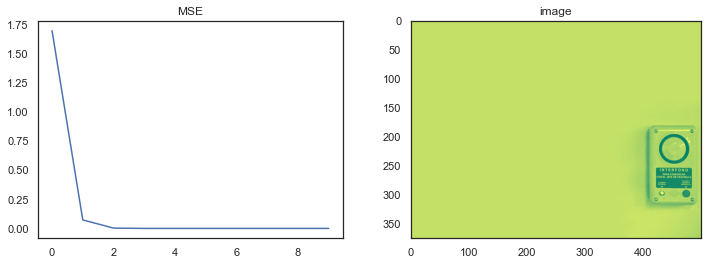

image shape:  (334, 500)
MSE 10% components 33:  95.91100381134191
MSE 20% components 66:  43.28619522393356
MSE 30% components 100:  23.043064035556988
MSE 40% components 133:  12.893313971208823
MSE 50% components 167:  6.994448645241706
MSE 60% components 200:  3.644745560072105
MSE 70% components 233:  1.7264454683000674
MSE 80% components 267:  0.6547062442148254
MSE 90% components 300:  0.1738535475053514
MSE 100% components 334:  4.6036475615284614e-26


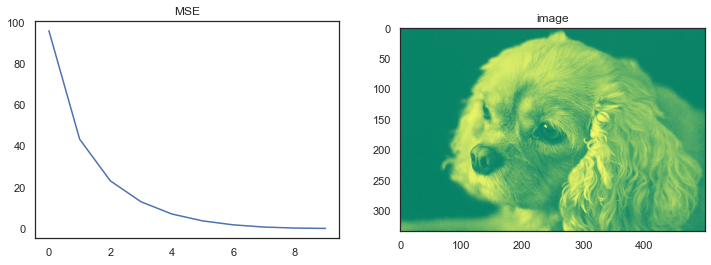

image shape:  (375, 500)
MSE 10% components 37:  61.06533863073876
MSE 20% components 75:  35.17319961495569
MSE 30% components 112:  21.95047061960812
MSE 40% components 150:  13.225429177577695
MSE 50% components 187:  7.738919354453643
MSE 60% components 225:  4.163250193941221
MSE 70% components 262:  2.054460743556031
MSE 80% components 300:  0.8326610758993014
MSE 90% components 337:  0.2291831422859637
MSE 100% components 375:  8.964224805442525e-26


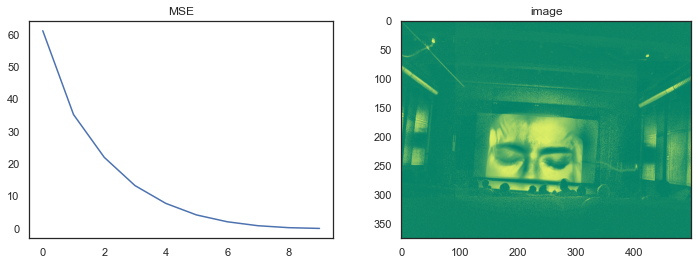

image shape:  (404, 500)
MSE 10% components 40:  1665.5018465608418
MSE 20% components 80:  919.474336938893
MSE 30% components 121:  547.2497080241715
MSE 40% components 161:  329.12108709425456
MSE 50% components 202:  187.0276266200768
MSE 60% components 242:  99.82688921867626
MSE 70% components 282:  46.80356941360541
MSE 80% components 323:  16.966441059193365
MSE 90% components 363:  3.891191804173552
MSE 100% components 404:  3.851994541082589e-26


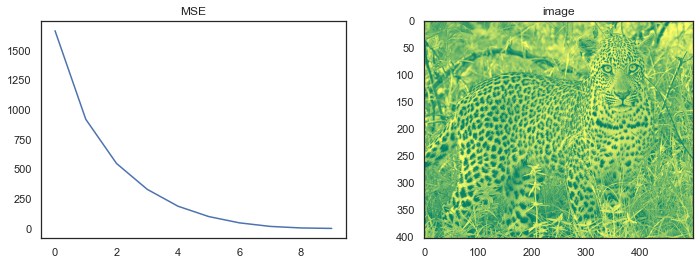

image shape:  (500, 492)
MSE 10% components 49:  45.270010931385
MSE 20% components 98:  15.368383140545914
MSE 30% components 147:  7.470650035005283
MSE 40% components 196:  3.9709608756214285
MSE 50% components 246:  1.9487609491641145
MSE 60% components 295:  0.8455465372991632
MSE 70% components 344:  0.2899615109126702
MSE 80% components 393:  0.06121492021192601
MSE 90% components 442:  0.004413686430398727
MSE 100% components 492:  1.0454537159770226e-25


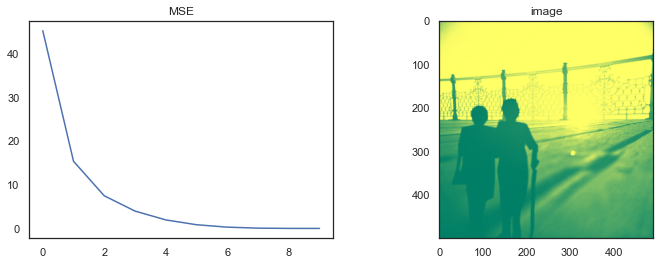

In [48]:
# Провести реконструкцію зображення при використанні лише частки (𝛼%)компонентів розкладу, що характеризуються відмінними від нуля сингулярними числами. 
for image in images[:5]:
    image_errors = list()
    print('image shape: ', image.shape)
    
    for i in range(1, 10 + 1):
        comp_n = int(min(image.shape[0], image.shape[1]) * i * 0.1)
        res = pca_compres(image, components = comp_n )
        error = mean_squared_error(image, res)
        image_errors.append(error)
        print(f'MSE {i*10}% components {comp_n}: ', error) 
        
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.title('MSE')
    plt.plot(image_errors)
    
    plt.subplot(122)
    plt.title('image')
    plt.imshow(image, cmap='summer')
    plt.show();

In [49]:
def total_mse(data):
    total_mse = np.zeros(10, )
    for image in data:
        
        sample_errors = list()
        
        for i in range(1, 10 + 1):
            comp_n = int(min(image.shape[0], image.shape[1]) * i * 0.1)
            res = pca_compres(image, components = comp_n )
            error = mean_squared_error(image, res)
            sample_errors.append(error)
            
        np.add(total_mse, np.array(sample_errors), out = total_mse)
    return total_mse / len(data)

245.14053112675694 122.29182894850365 67.27718864684596 36.932538757929855 19.806538698835453 9.958780957989664 4.519852232369974 1.6821727843187997 0.4176573268324958 5.0043850113088807e-26


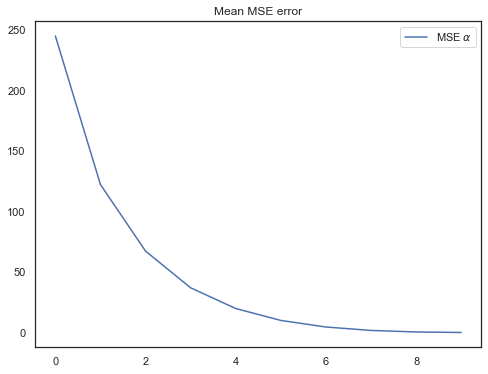

In [50]:
error = total_mse(images)
print(*error)
plt.figure(figsize=(8, 6))
plt.title('Mean MSE error')
plt.plot(error, label='MSE $\\alpha$')
plt.legend()
plt.show();

# Провести моделювання каналу зеленого кольору тестових зображень з використанням марківських ланцюгів першого порядку $𝑀_1$: 
### Отримати стохастичну матрицю для каналу зеленого кольору при обробці пікселів: 
 - По горизонталі, зліва направо
 - По горизонталі, справа наліво
 - По вертикалі, зверху вниз
 - По вертикалі, знизу вгору
 - По головній діагоналі, вниз
 - По головній діагоналі, вгору
 - По побічній діагоналі, вниз
 - По побічній діагоналі, вгору

(375, 500)


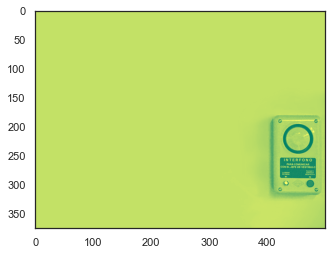

In [51]:
plt.imshow(images[0], cmap='summer') 
print(images[0].shape)

In [52]:
def normalize_matrix(matrix):
    row_sums = matrix.sum(axis = 1)
    res = matrix / row_sums[:, np.newaxis]
    return res

In [53]:
def image_iteration_left_right(image, matrix):
    h, w = image.shape
    for i in range(h):
        for j in range(w - 1):
            val_1 = image[i][j]
            val_2 = image[i][j + 1]
            matrix[val_2][val_1] += 1
    return matrix

In [54]:
def image_iteration_right_left(image, matrix):
    h, w = image.shape
    for i in range(h):
        for j in range(w - 1):
            val_1 = image[i][w - j - 2]
            val_2 = image[i][w - j - 1]
            matrix[val_1][val_2] += 1
    return matrix    

In [55]:
def image_iteration_top_down(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w):
            val_1 = image[i][j]
            val_2 = image[i + 1][j]
            matrix[val_2][val_1] += 1
    return matrix  

In [56]:
def image_iteration_down_up(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w):
            val_1 = image[h - i - 2][j]
            val_2 = image[h - i - 1][j]
            matrix[val_1][val_2] += 1
    return matrix  

In [57]:
def main_diagonal_top_down(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[i][j]
            val_2 = image[i + 1][j + 1]
            matrix[val_2][val_1] += 1
    return matrix  

In [58]:
def main_diagonal_down_up(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[h - i - 2][w - j - 2]
            val_2 = image[h - i - 1][w - j - 1]
            matrix[val_1][val_2] += 1
    return matrix  

In [59]:
def opposite_diagonal_top_down(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[i][w - j - 1]
            val_2 = image[i + 1][w - j - 2]
            matrix[val_2][val_1] += 1
    return matrix  

In [60]:
def opposite_diagonal_down_up(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[h - i - 1][j]
            val_2 = image[h - i - 2][j + 1]
            matrix[val_2][val_1] += 1
    return matrix  

In [61]:
def general_stochastic_matrix(data, hmm_type = 'h_left_right'):
    stochastic_matrix = np.zeros((256, 256))
    if hmm_type == 'h_left_right':
        for image in data:
            image_iteration_left_right(image, stochastic_matrix)
                
    if hmm_type == 'h_right_left':
        for image in data:
            image_iteration_right_left(image, stochastic_matrix)
                
    if hmm_type == 'v_top_down':
        for image in data:
            image_iteration_top_down(image, stochastic_matrix)
                
    if hmm_type == 'v_down_up':
        for image in data:
            image_iteration_down_up(image, stochastic_matrix)
                
    if hmm_type == 'dm_top_down':
        for image in data:
            main_diagonal_top_down(image, stochastic_matrix)
                
    if hmm_type == 'dm_down_up':
        for image in data:
            main_diagonal_down_up(image, stochastic_matrix)
                
    if hmm_type == 'ds_top_down':
        for image in data:
            opposite_diagonal_top_down(image, stochastic_matrix)
                
    if hmm_type == 'ds_down_up':
        for image in data:
            opposite_diagonal_down_up(image, stochastic_matrix)
            
    stochastic_matrix = normalize_matrix(stochastic_matrix)
    return stochastic_matrix

In [62]:
def regularity_check(matrix, k):
    new_matrix = matrix_power(matrix, k)
    return not ((new_matrix <= 0).sum() != 0)

In [63]:
def recurrence_check(matrix, k):
    new_matrix = matrix_power(matrix, k)
    for i in range(new_matrix.shape[0]):
        if new_matrix[~i, i] == 0:
            return False
        return True

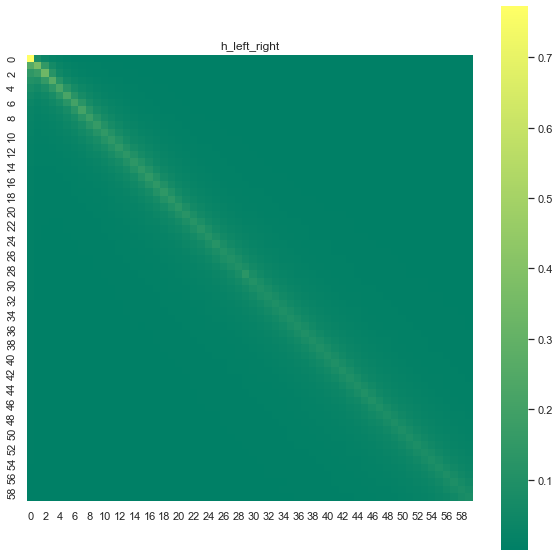

Matrix is regular:  True
Marix is recurrent:  True


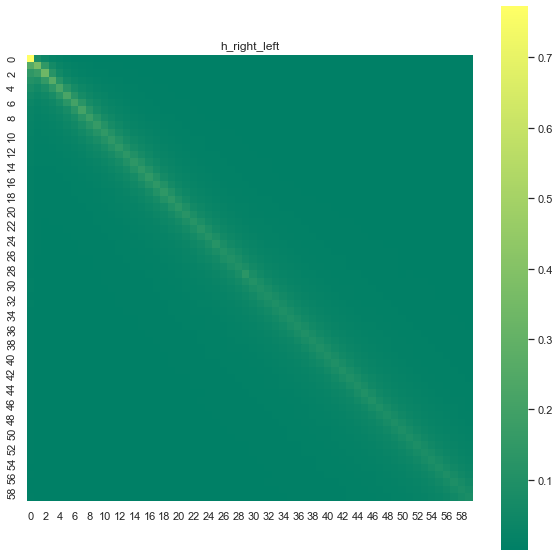

Matrix is regular:  True
Marix is recurrent:  True


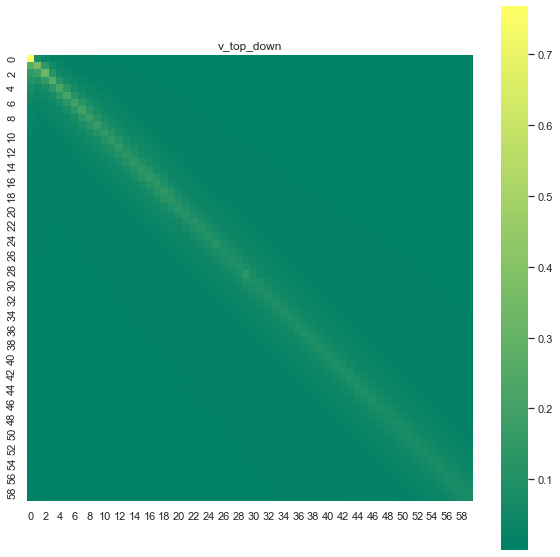

Matrix is regular:  True
Marix is recurrent:  True


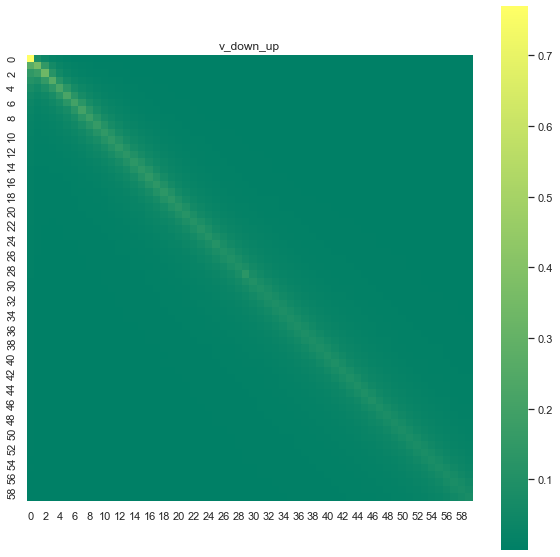

Matrix is regular:  True
Marix is recurrent:  True


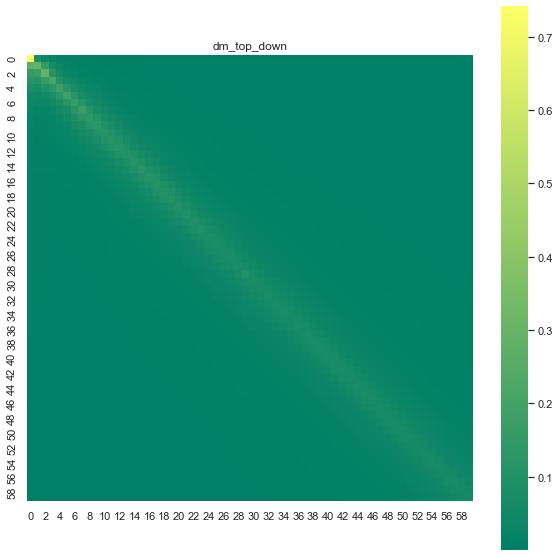

Matrix is regular:  True
Marix is recurrent:  True


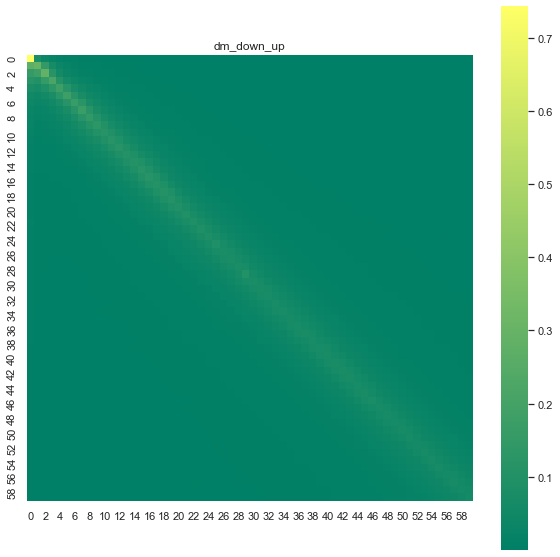

Matrix is regular:  True
Marix is recurrent:  True


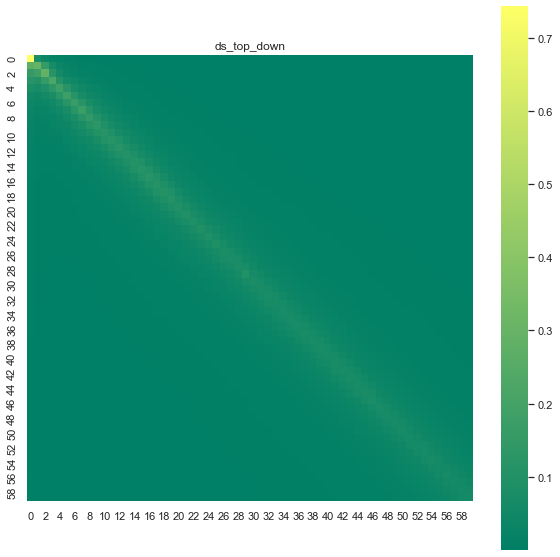

Matrix is regular:  True
Marix is recurrent:  True


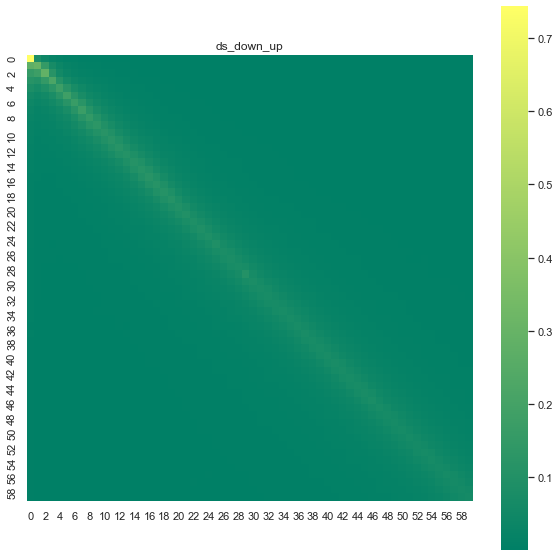

Matrix is regular:  True
Marix is recurrent:  True


In [64]:
hmm_types = ['h_left_right', 'h_right_left', 'v_top_down', 'v_down_up', 'dm_top_down', 'dm_down_up', 'ds_top_down', 'ds_down_up']

for i, type_ in enumerate(hmm_types):
    matrix = general_stochastic_matrix(images, hmm_type=type_)
    plt.figure(figsize=(10, 10))
    plt.title(type_)
    sns.heatmap(matrix[:6 * 10, :6 * 10], square=True, cmap='summer')
    plt.show();
    
    regular = regularity_check(matrix, k = 5)
    print('Matrix is regular: ', regular)
    recurrent = recurrence_check(matrix, k = 5)
    print('Marix is recurrent: ', recurrent)